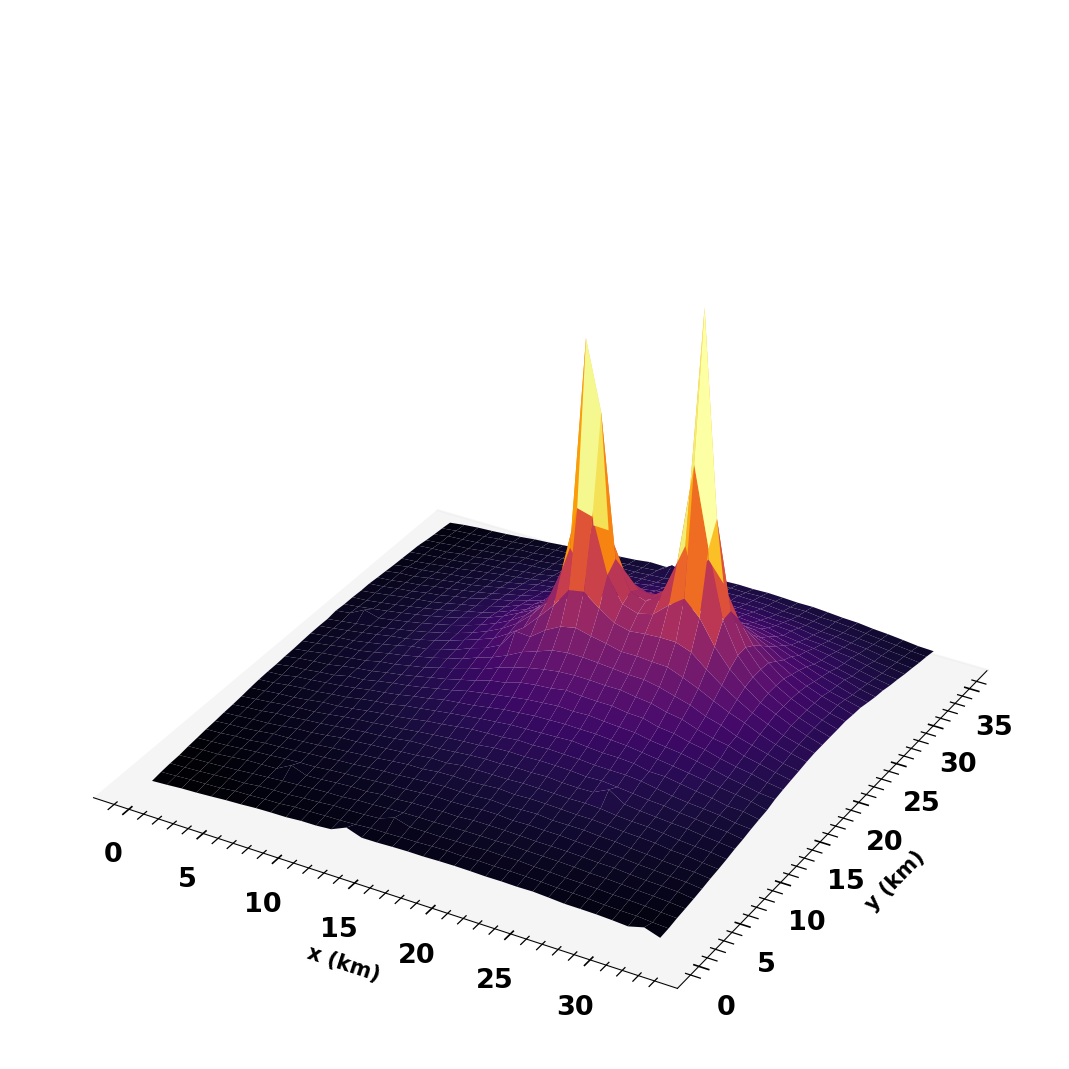

In [42]:
import numpy as np
import matplotlib.pyplot as plt
import os
from obspy.geodetics import degrees2kilometers, locations2degrees
from seismic.plot.plot_utils import set_mpl_params

set_mpl_params()


lat = [46.05, 46.36]
lon = [-122.45, -122.03]


# Y-extent
y = degrees2kilometers(lat[1]-lat[0])

# X-Extent
x = degrees2kilometers(locations2degrees(lat[0], lon[0], lat[0], lon[1]))

X, Y = np.meshgrid(np.arange(0, x+1, 1), np.arange(0, y+1, 1))

# Load the data
infolder = '../spatial/linearised/synthetic_test_fine_dvfilt_allcc_cl2_std0.004_largemap/{freq}-{freq2}/ppdk.npz'

for freq in [0.5]:
    freq2 = 2*freq
    loaded = np.load(infolder.format(freq=freq, freq2=freq2))
    skernels = loaded['skernels']

    # Plot the data
    fig, ax = plt.subplots(subplot_kw={"projection": "3d"}, figsize=(12, 9))
    surf = ax.plot_surface(X, Y, np.reshape(skernels[58], X.shape), linewidth=0, antialiased=True, cmap='inferno')
    # plt.colorbar(surf);
    plt.xlabel('x (km)')
    plt.ylabel('y (km)')
# remove z axis
    ax.set_zticks([])
    # remove z grid as well
    ax.grid(False)
    # remove background canvas
    ax.xaxis.pane.fill = False
    ax.yaxis.pane.fill = False
    # ax.zaxis.pane.fill = False

    # remove vertical spines
    ax.xaxis.pane.set_edgecolor('w')
    ax.yaxis.pane.set_edgecolor('w')
    # ax.zaxis.pane.set_edgecolor('w')

    # remove vertical spines
    ax.zaxis.line.set_color('w')
    plt.savefig(f'../paper/figures/skernel_{freq}Hz.pdf', dpi=300, bbox_inches='tight')